In [263]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [264]:
nx = 41
ny = 41
nt = 100
nit = 50
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx)) 
b = numpy.zeros((ny, nx))

u[-1,:] = 1
u[0,:] = 0
u[:,-1] = 0
u[:, 0] = 0
v[-1,:] = 0
v[0,:] = 0
v[:,-1] = 0
v[:, 0] = 0

In [265]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    b[1:-1,1:-1] = rho*(((u[1:-1,2:] - u[1:-1,0:-2])/2*dx)**2 + ((u[2:,1:-1] - u[0:-2,1:-1])*(v[1:-1,2:]-v[1:-1,0:-2]))/(2*dx*dy)+ ((v[2:,1:-1] - v[0:-2,1:-1])/2*dy)**2 + (1/dt)*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx)+(v[2:,1:-1] - v[0:-2,1:-1])/(2*dy)))
    return b

In [266]:
def pressure_poission(p,b,dx,dy):
    for n in range (nit):
        pn = p.copy()
        p[1:-1,1:-1] = (dy**2*(pn[1:-1,2:]+pn[1:-1,0:-2]) + dx**2*(pn[2:,1:-1]+pn[0:-2,1:-1]))/(2*(dx**2+dy**2)) - b[1:-1,1:-1]*dx**2*dy**2/(2*(dx**2+dy**2))
        p[0,:] = p[1,:] 
        p[-1,:] = 0
        p[:,1] = p[:,0]
        p[:,-1] = p[:,-2]
    return p

In [267]:
def Navier_stokes(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        u[1:-1,1:-1] = un[1:-1,1:-1] - (dt/dx)*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2]) - (dt/dy)*vn[1:-1,1:-1]*(un[1:-1,1:-1]-un[0:-2,1:-1]) - (dt/rho)*(p[1:-1,2:] - p[1:-1,0:-2])/(2*dx) + (nu*dt/dx**2)*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2]) + (nu*dt/dy**2)*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])
        v[1:-1,1:-1] = vn[1:-1,1:-1] - (dt/dx)*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[1:-1,0:-2]) - (dt/dy)*vn[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[0:-2,1:-1]) + (nu*dt/dx**2)*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2]) + (nu*dt/dy**2)*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1]) - (dt/rho)*(p[2:,1:-1] - p[0:-2,1:-1])/(2*dy)
        u[-1, :] = 2
        u[0,:]  = 0
        u[:,-1] = 0
        u[:, 0] = 0
        v[-1,:] = 0
        v[0,:]  = 0
        v[:,-1] = 0
        v[:, 0] = 0
    return u,v,p

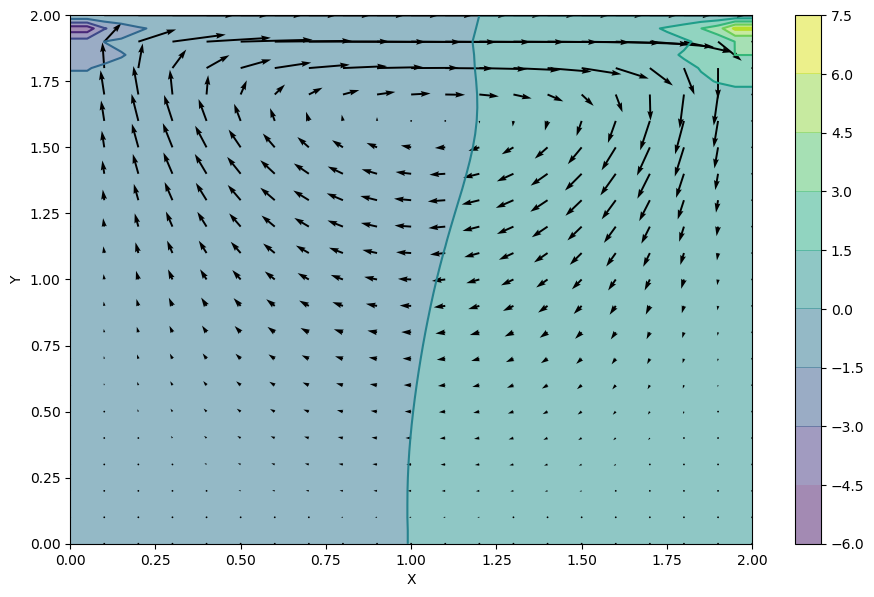

In [268]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 500
u,v,p = Navier_stokes(nt, u, v, dt, dx, dy, p, rho, nu)
fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');